In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Import**

**Coteq**

In [2]:
data0= pd.read_csv('/content/drive/My Drive/Electricity/coteq_electricity_2015.csv')
data0['Year'] = '2015'
data1= pd.read_csv('/content/drive/My Drive/Electricity/coteq_electricity_2016.csv')
data1['Year'] = '2016'
data2= pd.read_csv('/content/drive/My Drive/Electricity/coteq_electricity_2017.csv')
data2['Year'] = '2017'
data3= pd.read_csv('/content/drive/My Drive/Electricity/coteq_electricity_2018.csv')
data3['Year'] = '2018'
data4= pd.read_csv('/content/drive/My Drive/Electricity/coteq_electricity_2019.csv')
data4['Year'] = '2019'
data5= pd.read_csv('/content/drive/My Drive/Electricity/coteq_electricity_2014.csv')
data5['Year'] = '2014'
listd= [data0,data1,data2,data3,data4,data5]
coteq= pd.concat (listd, axis=0, sort=False)
del [data0,data1,data2,data3,data4,data5]
coteq

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89,1x35,4122,89.47,0.0,2015
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37,100.00,100.00,86,1x35,1800,94.59,0.0,2015
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100,1x35,1315,100.00,0.0,2015
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25,92.00,84.00,44,1x35,6379,92.00,0.0,2015
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36,1x35,4404,92.86,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Sterrebos,7609ZP,7609ZP,ALMELO,27,14.81,100.00,96,1x35,2619,100.00,0.0,2014
2499,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Loofgang,7609ZR,7609ZR,ALMELO,28,71.43,100.00,89,1x35,3846,100.00,0.0,2014
2500,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Vista,7609ZS,7609ZS,ALMELO,25,60.00,100.00,76,1x35,5312,96.00,0.0,2014
2501,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Tuinvaas,7609ZT,7609ZT,ALMELO,18,77.78,100.00,94,1x35,4111,100.00,0.0,2014


**Rendo**

In [3]:
data0= pd.read_csv('/content/drive/My Drive/Electricity/rendo_electricity_2015.csv')
data0['Year'] = '2015'
data1= pd.read_csv('/content/drive/My Drive/Electricity/rendo_electricity_2016.csv')
data1['Year'] = '2016'
data2= pd.read_csv('/content/drive/My Drive/Electricity/rendo_electricity_2017.csv')
data2['Year'] = '2017'
data3= pd.read_csv('/content/drive/My Drive/Electricity/rendo_electricity_2017.csv')
data3['Year'] = '2018'
data4= pd.read_csv('/content/drive/My Drive/Electricity/rendo_electricity_2019.csv')
data4['Year'] = '2019'
data5= pd.read_csv('/content/drive/My Drive/Electricity/rendo_electricity_2014.csv')
data5['Year'] = '2014'
listd= [data0,data1,data2,data3,data4,data5]
rendo= pd.concat (listd, axis=0, sort=False)
del [data0,data1,data2,data3,data4,data5]
rendo

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,Year
0,8716912000008,871691280000000008,Stationsplein,7901AA,7901AA,HOOGEVEEN,41.0,100.00,100.0,73.0,1x40,3663,2015
1,8716912000008,871691280000000008,Stationsstraat,7901AB,7901AB,HOOGEVEEN,16.0,87.50,100.0,63.0,3x25,7004,2015
2,8716912000008,871691280000000008,Crerarstraat,7901AC,7901AC,HOOGEVEEN,17.0,100.00,100.0,94.0,1x25,2586,2015
3,8716912000008,871691280000000008,Crerarstraat,7901AD,7901AD,HOOGEVEEN,18.0,100.00,100.0,72.0,1x25,3177,2015
4,8716912000008,871691280000000008,Crerarstraat,7901AE,7901AG,HOOGEVEEN,19.0,94.74,100.0,89.0,3x25,5183,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,8716912000008,871691280000000008,Burg G W Stroinkweg,8343XL,8343XL,ZUIDVEEN,20.0,90.00,100.0,40.0,1x25,9414,2014
1463,8716912000008,871691280000000008,Burg G W Stroinkweg,8343XM,8343XM,ZUIDVEEN,20.0,100.00,100.0,55.0,3x25,5398,2014
1464,8716912000008,871691280000000008,Leemkoele,8343XN,8343XN,ZUIDVEEN,18.0,94.44,100.0,56.0,1x40,2977,2014
1465,8716912000008,871691280000000008,De Klim,8343XP,8343XR,ZUIDVEEN,34.0,94.12,100.0,47.0,1x40,4907,2014


**Westland-infra**

In [4]:
data0= pd.read_csv('/content/drive/My Drive/Electricity/westland-infra_electricity_2015.csv')
data0['Year'] = '2015'
data1= pd.read_csv('/content/drive/My Drive/Electricity/westland-infra_electricity_2016.csv')
data1['Year'] = '2016'
data2= pd.read_csv('/content/drive/My Drive/Electricity/westland-infra_electricity_2017.csv')
data2['Year'] = '2017'
data3= pd.read_csv('/content/drive/My Drive/Electricity/westland-infra_electricity_2018.csv')
data3['Year'] = '2018'
data4= pd.read_csv('/content/drive/My Drive/Electricity/westland-infra_electricity_2019.csv')
data4['Year'] = '2019'
data5= pd.read_csv('/content/drive/My Drive/Electricity/westland-infra_electricity_2014.csv')
data5['Year'] = '2014'
listd= [data0,data1,data2,data3,data4,data5]
westland= pd.concat (listd, axis=0, sort=False)
del [data0,data1,data2,data3,data4,data5]
westland

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,%Defintieve aansl (NRM),type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year
0,westland-infra,871687800090000015,OOSTEINDE,2291AA,2291AE,WATERINGEN,29,96.55,100.0,100,83,3x25,9908,89.66,17.24,2015
1,westland-infra,871687800090000015,WATERPARK,2291AK,2291AK,WATERINGEN,39,92.31,100.0,100,64,1x35,5210,100.00,7.69,2015
2,westland-infra,871687800090000015,AZALEAPARK,2291AL,2291AL,WATERINGEN,29,100.00,100.0,100,86,1x35,3354,100.00,0.00,2015
3,westland-infra,871687800090000015,DRUIVENLAAN,2291AN,2291AT,WATERINGEN,24,100.00,100.0,100,92,3x25,6031,100.00,4.17,2015
4,westland-infra,871687800090000015,KWAKLAAN,2291AV,2291AV,WATERINGEN,16,100.00,100.0,100,88,3x25,2832,100.00,6.25,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,westland-infra,871687800090000015,IN DE BALIJE,3155XA,3155XA,MAASLAND,14,100.00,100.0,100,100,3x25,6081,100.00,0.00,2014
2418,westland-infra,871687800090000015,KONINGIN JULIANAWEG,3155XB,3155XB,MAASLAND,14,100.00,100.0,100,86,3x25,5803,92.86,0.00,2014
2419,westland-infra,871687800090000015,KONINGIN JULIANAWEG,3155XC,3155XD,MAASLAND,28,89.29,100.0,100,86,3x25,7137,85.71,14.29,2014
2420,westland-infra,871687800090000015,KONINGIN JULIANAWEG,3155XE,3155XH,MAASLAND,28,100.00,100.0,100,100,3x25,4019,100.00,0.00,2014


# **Exploratory Data Analysis and Data Preprocessing**

In [5]:
coteq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15078 entries, 0 to 2502
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   net_manager                   15078 non-null  object 
 1   purchase_area                 15078 non-null  object 
 2   street                        15078 non-null  object 
 3   zipcode_from                  15078 non-null  object 
 4   zipcode_to                    15078 non-null  object 
 5   city                          15078 non-null  object 
 6   num_connections               15078 non-null  int64  
 7   delivery_perc                 15078 non-null  float64
 8   perc_of_active_connections    15078 non-null  float64
 9   type_conn_perc                15078 non-null  int64  
 10  type_of_connection            15078 non-null  object 
 11  annual_consume                15078 non-null  int64  
 12  annual_consume_lowtarif_perc  15078 non-null  float64
 13  sm

In [6]:
rendo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8836 entries, 0 to 1466
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_manager                 8836 non-null   int64  
 1   purchase_area               8836 non-null   int64  
 2   street                      8836 non-null   object 
 3   zipcode_from                8836 non-null   object 
 4   zipcode_to                  8836 non-null   object 
 5   city                        8836 non-null   object 
 6   num_connections             8831 non-null   float64
 7   delivery_perc               7349 non-null   float64
 8   perc_of_active_connections  7349 non-null   float64
 9   type_conn_perc              8831 non-null   float64
 10  type_of_connection          8831 non-null   object 
 11  annual_consume              8836 non-null   int64  
 12  Year                        8836 non-null   object 
dtypes: float64(4), int64(3), object(6

In [7]:
westland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14661 entries, 0 to 2421
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   net_manager                   14661 non-null  object 
 1   purchase_area                 14661 non-null  int64  
 2   street                        14661 non-null  object 
 3   zipcode_from                  14661 non-null  object 
 4   zipcode_to                    14661 non-null  object 
 5   city                          14661 non-null  object 
 6   num_connections               14661 non-null  int64  
 7   delivery_perc                 14661 non-null  float64
 8   perc_of_active_connections    14661 non-null  float64
 9   %Defintieve aansl (NRM)       14661 non-null  int64  
 10  type_conn_perc                14661 non-null  int64  
 11  type_of_connection            14661 non-null  object 
 12  annual_consume                14661 non-null  int64  
 13  an

In [8]:
coteq=coteq.drop(['annual_consume_lowtarif_perc','smartmeter_perc'], axis=1)
westland=westland.drop(['annual_consume_lowtarif_perc','smartmeter_perc','%Defintieve aansl (NRM)'], axis=1)

In [9]:
coteq.isnull().any()

net_manager                   False
purchase_area                 False
street                        False
zipcode_from                  False
zipcode_to                    False
city                          False
num_connections               False
delivery_perc                 False
perc_of_active_connections    False
type_conn_perc                False
type_of_connection            False
annual_consume                False
Year                          False
dtype: bool

In [10]:
rendo.isnull().any()

net_manager                   False
purchase_area                 False
street                        False
zipcode_from                  False
zipcode_to                    False
city                          False
num_connections                True
delivery_perc                  True
perc_of_active_connections     True
type_conn_perc                 True
type_of_connection             True
annual_consume                False
Year                          False
dtype: bool

In [11]:
rendo.isnull().sum()

net_manager                      0
purchase_area                    0
street                           0
zipcode_from                     0
zipcode_to                       0
city                             0
num_connections                  5
delivery_perc                 1487
perc_of_active_connections    1487
type_conn_perc                   5
type_of_connection               5
annual_consume                   0
Year                             0
dtype: int64

In [12]:
rendo = rendo.dropna()

In [13]:
westland.isnull().any()

net_manager                   False
purchase_area                 False
street                        False
zipcode_from                  False
zipcode_to                    False
city                          False
num_connections               False
delivery_perc                 False
perc_of_active_connections    False
type_conn_perc                False
type_of_connection            False
annual_consume                False
Year                          False
dtype: bool

**Label Encoding**

In [14]:
le = LabelEncoder()

In [15]:
objList = coteq.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    coteq[feat] = le.fit_transform(coteq[feat].astype(str))
print (coteq.info())

Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'type_of_connection', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15078 entries, 0 to 2502
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_manager                 15078 non-null  int64  
 1   purchase_area               15078 non-null  int64  
 2   street                      15078 non-null  int64  
 3   zipcode_from                15078 non-null  int64  
 4   zipcode_to                  15078 non-null  int64  
 5   city                        15078 non-null  int64  
 6   num_connections             15078 non-null  int64  
 7   delivery_perc               15078 non-null  float64
 8   perc_of_active_connections  15078 non-null  float64
 9   type_conn_perc              15078 non-null  int64  
 10  type_of_connection          15078 non-null  int64  
 11 

In [16]:
# Converting categorical values to numeric and saving into new dataframe and hence removing the old to clean memory
objList = rendo.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    rendo[feat] = le.fit_transform(rendo[feat].astype(str))

print (rendo.info())


Index(['street', 'zipcode_from', 'zipcode_to', 'city', 'type_of_connection',
       'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7344 entries, 0 to 1465
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_manager                 7344 non-null   int64  
 1   purchase_area               7344 non-null   int64  
 2   street                      7344 non-null   int64  
 3   zipcode_from                7344 non-null   int64  
 4   zipcode_to                  7344 non-null   int64  
 5   city                        7344 non-null   int64  
 6   num_connections             7344 non-null   float64
 7   delivery_perc               7344 non-null   float64
 8   perc_of_active_connections  7344 non-null   float64
 9   type_conn_perc              7344 non-null   float64
 10  type_of_connection          7344 non-null   int64  
 11  annual_consume              7344

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
# Converting categorical values to numeric and saving into new dataframe and hence removing the old to clean memory
objList = westland.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    westland[feat] = le.fit_transform(westland[feat].astype(str))

print (westland.info())


Index(['net_manager', 'street', 'zipcode_from', 'zipcode_to', 'city',
       'type_of_connection', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14661 entries, 0 to 2421
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   net_manager                 14661 non-null  int64  
 1   purchase_area               14661 non-null  int64  
 2   street                      14661 non-null  int64  
 3   zipcode_from                14661 non-null  int64  
 4   zipcode_to                  14661 non-null  int64  
 5   city                        14661 non-null  int64  
 6   num_connections             14661 non-null  int64  
 7   delivery_perc               14661 non-null  float64
 8   perc_of_active_connections  14661 non-null  float64
 9   type_conn_perc              14661 non-null  int64  
 10  type_of_connection          14661 non-null  int64  
 11  annual_consume  

**Data Preparation**

In [18]:
trainX = coteq.drop(['perc_of_active_connections'],axis=1)
trainY = coteq['perc_of_active_connections']
testX= rendo.drop(['perc_of_active_connections'],axis=1)
testY = rendo['perc_of_active_connections']
validX = westland.drop(['perc_of_active_connections'],axis=1)
validY = westland['perc_of_active_connections']

**Data Normalization**

In [19]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)
validX = scaler.fit_transform(validX)

## **LSTM**

In [20]:
# Initializing parameters
input_dim = 12
timesteps = 1

In [21]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (len(trainX), timesteps, len(trainX[0])))
testX = np.reshape(testX, (len(testX), timesteps, len(testX[0])))
validX = np.reshape(validX, (len(validX), timesteps, len(validX[0])))

In [22]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,input_shape=(1,12)))
# Adding a dropout layer
model.add(Dropout(.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5760      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [24]:
# Training the model
model.fit(trainX, trainY,batch_size=50,epochs=10)

Epoch 1/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05
Epoch 2/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05
Epoch 3/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05
Epoch 4/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05
Epoch 5/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05
Epoch 6/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05
Epoch 7/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05
Epoch 8/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05
Epoch 9/10
302/302 [==============================] - 1s 3ms/step - loss: 1.1740e-05
Epoch 10/10
302/302 [==============================] - 1s 2ms/step - loss: 1.1740e-05


In [25]:
# make predictions
trainPred = model.predict(trainX)
testPred = model.predict(testX)
validPred = model.predict(validX)

In [26]:
# calculate root mean absolute percentage error
trainMAPE = (mean_absolute_error(trainY, trainPred))/100
print('Train Score: %.2f MAPE' % (trainMAPE))
testMAPE =(mean_absolute_error(testY, testPred))/100
print('Test Score: %.2f MAPE' % (testMAPE))
valMAPE = (mean_absolute_error(validY, validPred))/100
print('Valid Score: %.2f MAPE' % (valMAPE))

Train Score: 0.98 MAPE
Test Score: 0.99 MAPE
Test Score: 0.99 MAPE


## **ARIMA**

Rendo

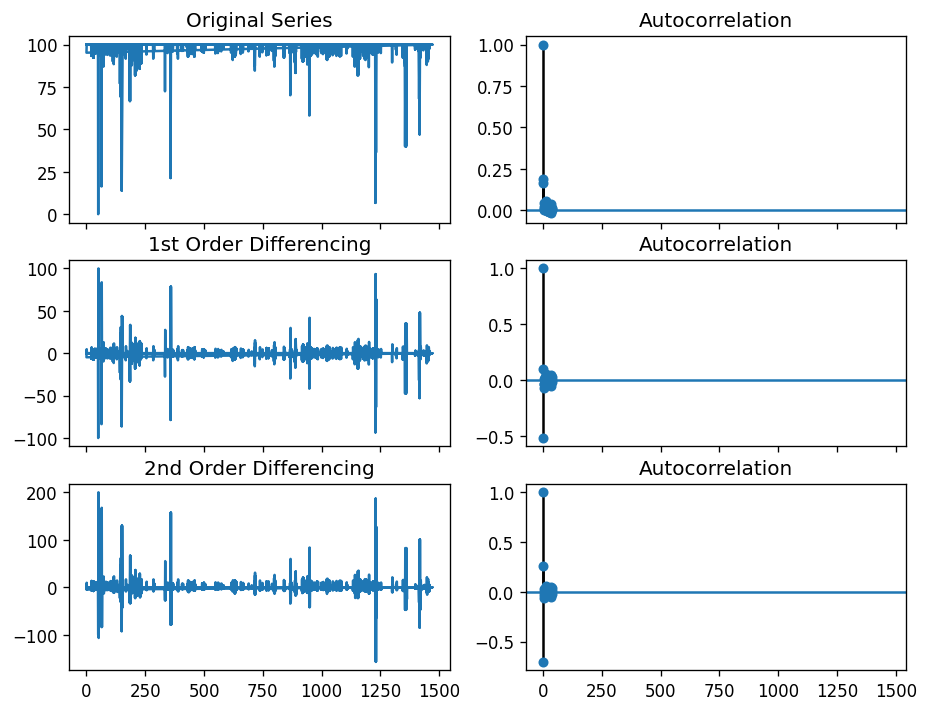

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
rendo=rendo['perc_of_active_connections']
# # Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(rendo); axes[0, 0].set_title('Original Series')
plot_acf(rendo, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(rendo.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(rendo.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(rendo.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(rendo.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [28]:
# Create Training and Test
train = rendo[:7300]
test = rendo[7300:]

In [29]:
# fit model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 
print(fitted.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                  ARIMA Model Results                                   
Dep. Variable:     D.perc_of_active_connections   No. Observations:                 7299
Model:                           ARIMA(1, 1, 1)   Log Likelihood              -20773.809
Method:                                 css-mle   S.D. of innovations              4.166
Date:                          Thu, 24 Sep 2020   AIC                          41555.617
Time:                                  10:37:08   BIC                          41583.199
Sample:                                       1   HQIC                         41565.102
                                                                                        
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -2.887e-05      0.000     -0.090      0.929    

In [30]:
# Forecast
fc, se, conf = fitted.forecast(44, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [31]:
# calculate root mean absolute percentage error
mape = (mean_absolute_error(test, conf[:, 1]))/100
print('Train Score: %.2f MAPE' % (mape))

Train Score: 0.08 MAPE


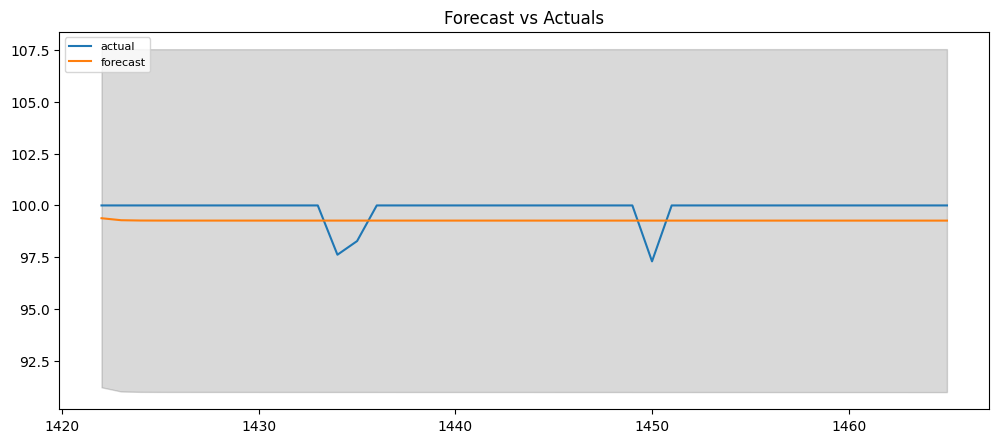

In [32]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Coteq

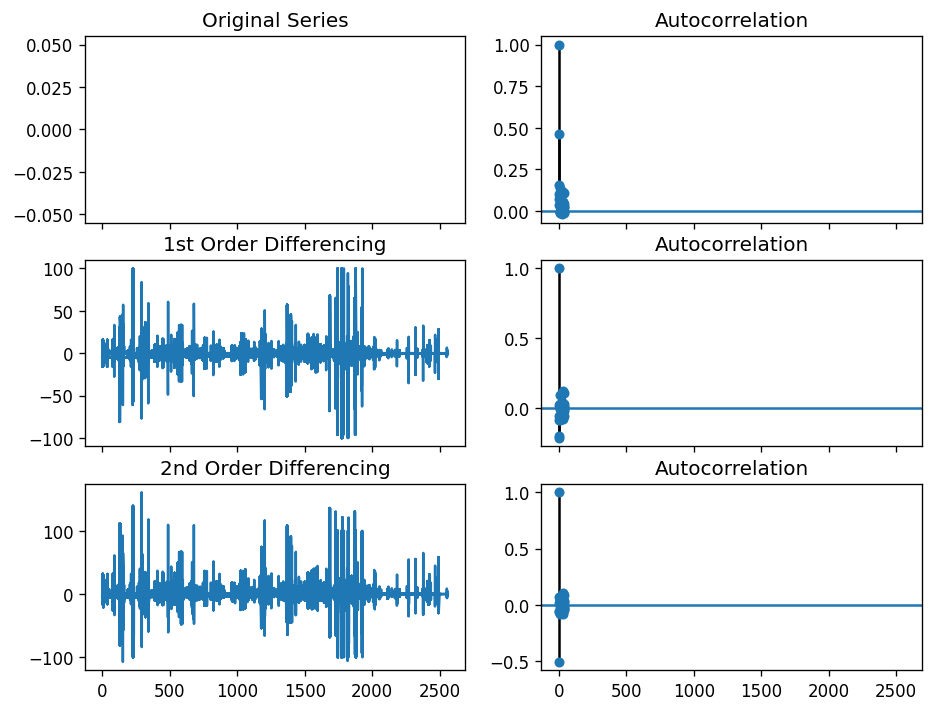

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# # Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
coteq=coteq['perc_of_active_connections']
axes[0, 0].plot(); axes[0, 0].set_title('Original Series')
plot_acf(coteq, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(coteq.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(coteq.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(coteq.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(coteq.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [34]:
# Create Training and Test
train = coteq[:15000]
test = coteq[15000:]
# Forecast
fc, se, conf = fitted.forecast(78, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [35]:
# calculate root mean absolute percentage error
mape = (mean_absolute_error(test, conf[:, 1]))/100
print('Train Score: %.2f MAPE' % (mape))

Train Score: 0.08 MAPE


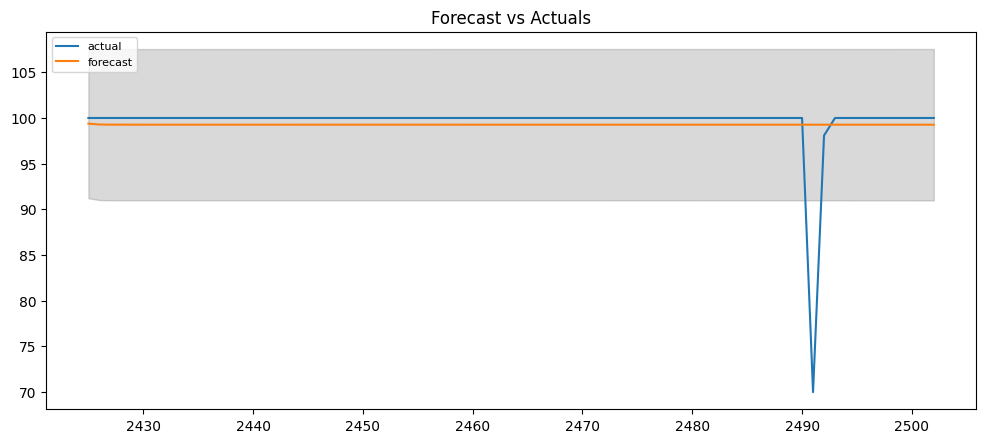

In [36]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Westland-Infra

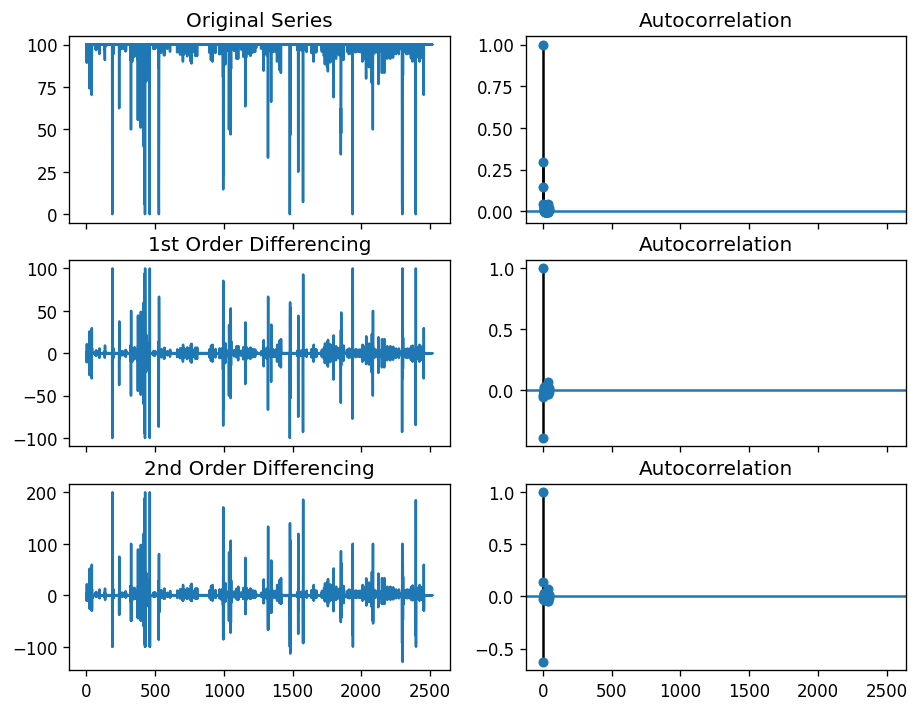

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
westland = westland['perc_of_active_connections']
# # Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(westland); axes[0, 0].set_title('Original Series')
plot_acf(westland, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(westland.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(westland.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(westland.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(westland.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [38]:
# Create Training and Test
train = westland[:14600]
test = westland[14600:]

In [39]:
# Forecast
fc, se, conf = fitted.forecast(61, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [40]:
# calculate root mean absolute percentage error
mape = (mean_absolute_error(test, conf[:, 1]))/100
print('Train Score: %.2f MAPE' % (mape))

Train Score: 0.08 MAPE


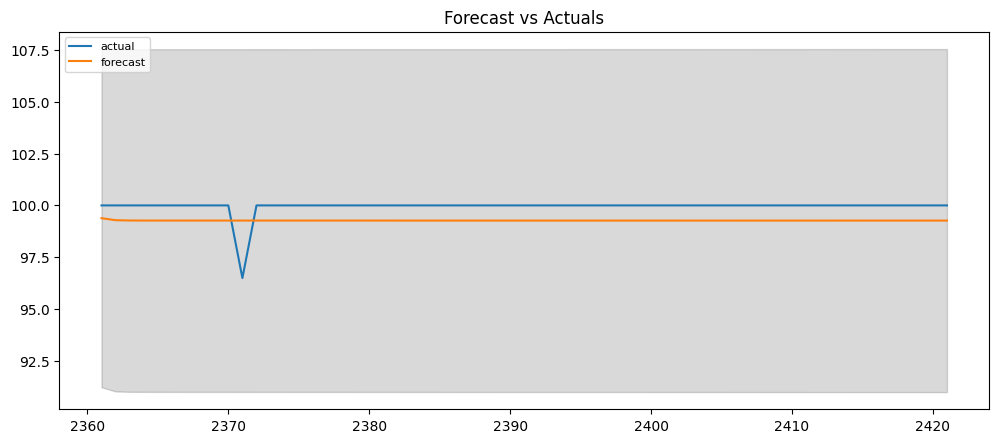

In [41]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()